In [5]:
import pandas as pd
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [6]:
stock_price  = pd.read_csv('stock.csv')
stock_vol  = pd.read_csv('stock_volume.csv')
stock_price = stock_price.sort_values(by = ['Date'])
stock_vol = stock_vol.sort_values(by = ['Date'])


In [7]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [8]:
stock_vol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [9]:
stock_price.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [10]:
stock_vol.describe()

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

In [11]:
def normalize(df):
    x = df.copy()
    for i in x.columns[1: ]:
        x[i] = x[i]/x[i][0]
    return x    

In [12]:
def interactiveplot(df,title):
    fig = px.line(title=title)
    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y = df[i], name= i )
       
    fig.show()    

In [13]:
interactiveplot(normalize(stock_vol),'title')

In [14]:
normalize(stock_price)

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

In [15]:
normalize(stock_vol)

Date      AAPL         BA         T       MGM      AMZN       IBM  \
0     2012-01-12  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1     2012-01-13  1.063195   1.179591  0.833492  0.929054  0.882599  0.767214   
2     2012-01-17  1.142577   0.940424  0.886429  0.865279  1.048034  0.872460   
3     2012-01-18  1.302013   1.064811  0.830407  1.027751  1.387630  0.668595   
4     2012-01-19  1.231205   1.371788  0.962767  0.783792  1.317539  1.245052   
...          ...       ...        ...       ...       ...       ...       ...   
2154  2020-08-05  0.573845  11.831491  0.867248  1.057185  0.729697  0.534137   
2155  2020-08-06  0.952215   8.367416  0.826397  2.004779  0.731665  0.496599   
2156  2020-08-07  0.930504   4.905731  1.146633  1.930027  0.729622  0.530591   
2157  2020-08-10  0.999136   9.113661  1.339605  3.980733  0.588083  0.576704   
2158  2020-08-11  0.881918  15.495463  1.168503  1.920391  0.688217  0.726421   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      7.542027  1.230422  0.918525  
2      6.378171  1.018170  0.997662  
3      1.727958  1.472745  1.018973  
4      1.708899  3.362501  1.110948  
...         ...       ...       ...  
2154   6.825723  0.525847  1.177201  
2155   8.216509  0.530071  1.061594  
2156  12.180858  0.418818  1.021137  
2157  10.314411  0.342498  1.074301  
2158  11.457562  0.385719  1.265619  

[2159 rows x 10 columns]

In [16]:
def individualstock(price_df,volume_df,name):
    return  pd.DataFrame({'Date':price_df['Date'], 'Close':price_df[name], 'Volume':volume_df[name]})


In [17]:
individual_stock_data = individualstock(stock_price,stock_vol,'sp500')

In [18]:
def trading_window(data):
    n = 1
    data['Target'] = data[['Close']].shift(-n)
    return data

In [19]:
price_volume_target = trading_window(individual_stock_data)

In [20]:
price_volume_target = price_volume_target[:-1]

In [21]:
price_volume_target

Date        Close      Volume       Target
0     2012-01-12  1295.500000  4019890000  1289.089966
1     2012-01-13  1289.089966  3692370000  1293.670044
2     2012-01-17  1293.670044  4010490000  1308.040039
3     2012-01-18  1308.040039  4096160000  1314.500000
4     2012-01-19  1314.500000  4465890000  1315.380005
...          ...          ...         ...          ...
2153  2020-08-04  3306.510010  4621670000  3327.770020
2154  2020-08-05  3327.770020  4732220000  3349.159912
2155  2020-08-06  3349.159912  4267490000  3351.280029
2156  2020-08-07  3351.280029  4104860000  3360.469971
2157  2020-08-10  3360.469971  4318570000  3333.689941

[2158 rows x 4 columns]

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
price_volume_target_scaled = sc.fit_transform(price_volume_target.drop(columns = ['Date']))

In [23]:
price_volume_target_scaled

array([[0.00828228, 0.35544202, 0.00524163],
       [0.00524163, 0.31342927, 0.00741423],
       [0.00741423, 0.35423623, 0.01423076],
       ...,
       [0.98245348, 0.38720299, 0.98345918],
       [0.98345918, 0.36634157, 0.9878185 ],
       [0.9878185 , 0.3937553 , 0.97511517]])

In [24]:
X = price_volume_target_scaled[: , :2]

In [25]:
X.shape


(2158, 2)

In [26]:
y = price_volume_target_scaled[: , 2:]

In [27]:
y.shape

(2158, 1)

In [28]:
split = int(0.65 * len(X))


In [29]:
X_train  =X[:split]

In [30]:
y_train = y[:split]

In [31]:
X_test = X[split:]
y_test = y[split:]

In [32]:
individual_stock_data2 = individualstock(stock_price,stock_vol,'AMZN')


In [33]:
price_volume_target2 = trading_window(individual_stock_data2)
price_volume_target2 = price_volume_target2[:-1]

In [34]:
price_volume_target2

Date        Close   Volume       Target
0     2012-01-12   175.929993  5385800   178.419998
1     2012-01-13   178.419998  4753500   181.660004
2     2012-01-17   181.660004  5644500   189.440002
3     2012-01-18   189.440002  7473500   194.449997
4     2012-01-19   194.449997  7096000   190.929993
...          ...          ...      ...          ...
2153  2020-08-04  3138.830078  4694300  3205.030029
2154  2020-08-05  3205.030029  3930000  3225.000000
2155  2020-08-06  3225.000000  3940600  3167.459961
2156  2020-08-07  3167.459961  3929600  3148.159912
2157  2020-08-10  3148.159912  3167300  3080.669922

[2158 rows x 4 columns]

In [35]:
price_volume_target2_scaled = sc.fit_transform(price_volume_target2.drop(columns = ['Date']))

In [36]:
price_volume_target2_scaled

array([[0.00000000e+00, 1.96062643e-01, 0.00000000e+00],
       [8.16644090e-04, 1.68541184e-01, 1.06348955e-03],
       [1.87926515e-03, 2.07322806e-01, 3.61717204e-03],
       ...,
       [1.00000000e+00, 1.33158939e-01, 9.81113236e-01],
       [9.81128659e-01, 1.32680154e-01, 9.74778247e-01],
       [9.74798844e-01, 9.95003221e-02, 9.52625541e-01]])

In [37]:
X2 = price_volume_target2_scaled[: , :2]
y2 = price_volume_target2_scaled[: , 2:]
y2_train = y2[:split]
X2_train  =X2[:split]
X2_test = X2[split:]
y2_test = y2[split:]

In [38]:
price_

NameError: name 'price_' is not defined

In [ ]:
X_train.shape

In [39]:
def show_plot(data,title):
    plt.figure(figsize = (15,7))
    plt.plot(data)
    plt.grid()
    plt.title(title)
    plt.show()
    

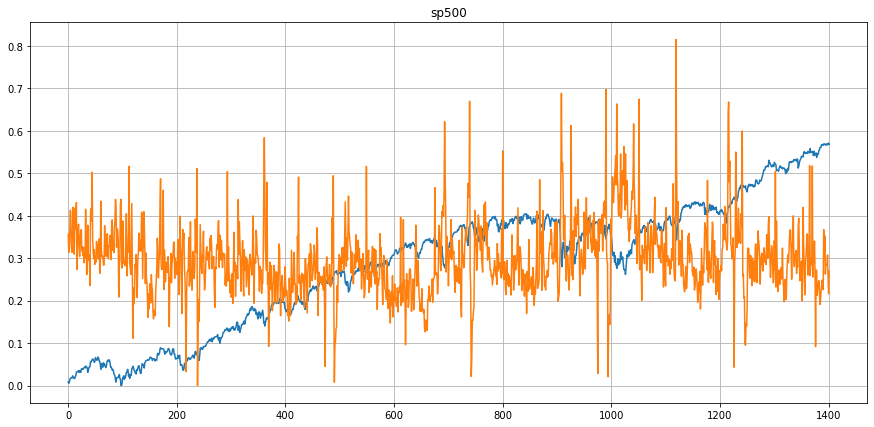

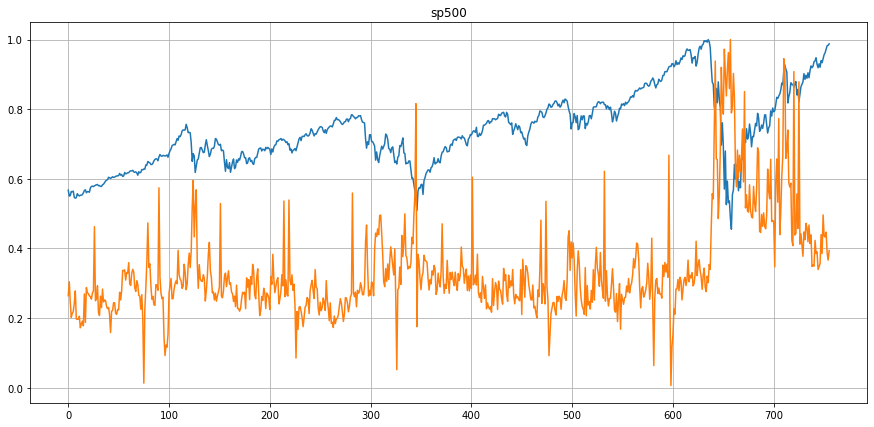

In [40]:
show_plot(X_train,'sp500')
show_plot(X_test,'sp500')


In [41]:
from sklearn.linear_model import Ridge

In [42]:
rm = Ridge(alpha = 1)
model = rm.fit(X_train,y_train)
accuracy = model.score(X_test,y_test)
accuracy

0.9513167837265547

In [43]:
predicted_prices = rm.predict(X)
predicted = []
for i in predicted_prices:
    predicted.append(i[0])
    

In [44]:
close = []
for i in price_volume_target_scaled:
    close.append(i[0])
close    

[0.008282282297732424,
 0.0052416276750753,
 0.00741422696906191,
 0.0142307573843935,
 0.01729509530784823,
 0.017712533229583327,
 0.018006633177067966,
 0.017366260479376172,
 0.02277870847379071,
 0.019159350140567022,
 0.018163150636518743,
 0.01658830576800918,
 0.016303702004927256,
 0.02184417795686766,
 0.02253203252528968,
 0.031715607508639554,
 0.03144519086195274,
 0.03273549031348555,
 0.03411583203621682,
 0.03505980086579574,
 0.030643552849788036,
 0.03497444905223135,
 0.03437200416912045,
 0.030923407809130832,
 0.037948686358382555,
 0.039461862239767,
 0.039926724634844146,
 0.037768427726387443,
 0.04051967285919389,
 0.04160122417680656,
 0.04247877616423823,
 0.04465612378760542,
 0.04157279302098682,
 0.04556210693085683,
 0.0434464861663616,
 0.04093236245154841,
 0.030985076796256172,
 0.03538239031520529,
 0.04168188600709555,
 0.04403468606133076,
 0.044139031192417466,
 0.05593157836290619,
 0.05513943653514419,
 0.05908607477541117,
 0.05983085000157784,


In [45]:
df_pred = price_volume_target[['Date']]
df_pred

Date
0     2012-01-12
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
...          ...
2153  2020-08-04
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10

[2158 rows x 1 columns]

In [46]:
df_pred['Close'] = close
df_pred['prediction'] = predicted
df_pred

Date     Close  prediction
0     2012-01-12  0.008282    0.017667
1     2012-01-13  0.005242    0.014615
2     2012-01-17  0.007414    0.016823
3     2012-01-18  0.014231    0.023452
4     2012-01-19  0.017295    0.026541
...          ...       ...         ...
2153  2020-08-04  0.962222    0.941668
2154  2020-08-05  0.972307    0.951470
2155  2020-08-06  0.982453    0.961144
2156  2020-08-07  0.983459    0.962065
2157  2020-08-10  0.987819    0.966356

[2158 rows x 3 columns]

In [47]:
interactiveplot(df_pred,'prediction vs real')

In [48]:
price_volume_df = individualstock(stock_price,stock_vol,'sp500')


In [49]:
training_data = price_volume_df.iloc[: ,1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_data_scaled = sc.fit_transform(training_data)

In [51]:
X = []
Y = []
for i in range(1,len(price_volume_df)):
    X.append(training_data_scaled[i-1:i, 0])
    Y.append(training_data_scaled[i, 0])

In [52]:
X = np.asarray(X)
Y = np.asarray(Y)
X

array([[0.00828228],
       [0.00524163],
       [0.00741423],
       ...,
       [0.98245348],
       [0.98345918],
       [0.9878185 ]])

In [53]:
split = int(0.70*len(X))
X_train = X[:split ]
X_test = X[split:]
Y_train = Y[:split]
Y_test = Y[split:]

In [54]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_train.shape

(1510, 1, 1)

In [55]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [56]:
# Trai the model
history = model.fit(
    X_train, Y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)


#predicted = model.predict(X)





Epoch 1/20
38/38 [==============================] - 5s 32ms/step - loss: 0.0309 - val_loss: 0.0614
Epoch 2/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 5.7307e-04 - val_loss: 2.2081e-04
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 4.1000e-04 - val_loss: 1.3455e-04
Epoch 5/20
38/38 [==============================] - 0s 7ms/step - loss: 3.6071e-04 - val_loss: 2.2008e-04
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 3.4714e-04 - val_loss: 4.8520e-04
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 3.4184e-04 - val_loss: 8.3619e-05
Epoch 8/20
38/38 [==============================] - 0s 6ms/step - loss: 3.1018e-04 - val_loss: 1.8451e-04
Epoch 9/20
38/38 [==============================] - 0s 7ms/step - loss: 2.6764e-04 - val_loss: 1.3582e-04
Epoch 10/20
38/38 [==============================] - 0s 7ms/s

In [57]:
predicted = model.predict(X)



68/68 [==============================] - 1s 2ms/step


In [58]:
test_prediction = []
for i in predicted:
    test_prediction.append(i[0])


In [59]:
test_prediction

[0.008503424,
 0.0054916926,
 0.0076436475,
 0.014395204,
 0.017430253,
 0.01784369,
 0.018134985,
 0.017500728,
 0.022861298,
 0.01927666,
 0.018290004,
 0.016730223,
 0.016448341,
 0.02193574,
 0.022616995,
 0.03171201,
 0.031444214,
 0.032722015,
 0.03408896,
 0.03502376,
 0.03065033,
 0.034939244,
 0.034342647,
 0.030927476,
 0.037884522,
 0.03938293,
 0.039843254,
 0.037706025,
 0.040430408,
 0.041501366,
 0.042370316,
 0.04452628,
 0.041473214,
 0.045423344,
 0.04332853,
 0.040839054,
 0.030988552,
 0.03534321,
 0.041581236,
 0.04391095,
 0.044014275,
 0.05568999,
 0.054905757,
 0.058812875,
 0.059550166,
 0.062170383,
 0.060184088,
 0.058949076,
 0.05420132,
 0.05623476,
 0.06534457,
 0.06347108,
 0.060193487,
 0.05913222,
 0.061569326,
 0.066532515,
 0.063874885,
 0.05710352,
 0.05669026,
 0.049232416,
 0.03814284,
 0.042896383,
 0.05175446,
 0.04362445,
 0.043300316,
 0.053262047,
 0.050613247,
 0.046752594,
 0.047508776,
 0.042064995,
 0.044427607,
 0.053219736,
 0.057582527,

In [60]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

Date
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
5     2012-01-20
...          ...
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10
2158  2020-08-11

[2158 rows x 1 columns]

In [61]:
df_predicted['predictions'] = test_prediction
close = []
for i in training_data_scaled:
    close.append(i[0])
    
    
    

In [62]:
df_predicted['Close'] = close[1:]

In [63]:
df_predicted

Date  predictions     Close
1     2012-01-13     0.008503  0.005242
2     2012-01-17     0.005492  0.007414
3     2012-01-18     0.007644  0.014231
4     2012-01-19     0.014395  0.017295
5     2012-01-20     0.017430  0.017713
...          ...          ...       ...
2154  2020-08-05     0.917112  0.972307
2155  2020-08-06     0.925978  0.982453
2156  2020-08-07     0.934876  0.983459
2157  2020-08-10     0.935757  0.987819
2158  2020-08-11     0.939572  0.975115

[2158 rows x 3 columns]

In [64]:
interactiveplot(df_predicted,'final plot')